In [1]:
#importando as bibliotecas
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#lendo o arquivo de ações
#Lendo csv

df = pd.read_csv("D:\\acoes\\df_all_bovespa.csv", delimiter=';')
df

,sigla_acao,nome_acao,data_pregao,preco_abertura,preco_maximo,preco_minimo,volume_total_negociado,qtd_total_negociado,preco_fechamento
0,ABCB4,ABC BRASIL,2009-01-02,5.05,5.30,4.95,1228496.0,241000.0,5.30
1,ABNB3,ABNOTE,2009-01-02,10.77,10.99,10.76,81680.0,7500.0,10.90
2,ABYA3,ABYARA,2009-01-02,1.55,1.64,1.53,175750.0,109800.0,1.61
3,ACGU3,GUARANI,2009-01-02,2.10,2.19,2.10,58216.0,27100.0,2.19
4,AELP3,AES ELPA,2009-01-02,17.00,18.30,17.00,17405.0,1000.0,18.30
...,...,...,...,...,...,...,...,...,...
865029,TEKA4,TEKA,2020-06-09,6.36,6.59,6.30,7013.0,1100.0,6.59
865030,VIVR3,VIVER,2020-06-09,1.80,2.14,1.75,6394965.0,3266300.0,1.92
865031,DTCY1,DTCOM-DIRECT,2020-06-09,0.77,0.87,0.77,3643.0,4300.0,0.82
865032,ETER9,ETERNIT,2020-06-09,2.92,3.09,2.80,178160.0,59900.0,3.00


In [3]:
#Itau
df_itau = df[df['sigla_acao'] == 'ITUB4' ]

In [4]:
df_itau.head(10)

,sigla_acao,nome_acao,data_pregao,preco_abertura,preco_maximo,preco_minimo,volume_total_negociado,qtd_total_negociado,preco_fechamento
29234,ITUB4,ITAUUNIBANCO,2009-05-20,29.50,30.84,29.50,291812233.0,9626900.0,30.03
29563,ITUB4,ITAUUNIBANCO,2009-05-21,29.61,30.15,29.41,143839395.0,4823400.0,29.99
29892,ITUB4,ITAUUNIBANCO,2009-05-22,30.40,30.59,29.42,153292069.0,5076900.0,30.38
30211,ITUB4,ITAUUNIBANCO,2009-05-25,30.35,30.67,29.93,51834816.0,1710900.0,30.40
30545,ITUB4,ITAUUNIBANCO,2009-05-26,30.15,31.79,29.90,295076559.0,9462000.0,31.55
30888,ITUB4,ITAUUNIBANCO,2009-05-27,31.60,32.50,31.46,239969265.0,7507900.0,31.69
31225,ITUB4,ITAUUNIBANCO,2009-05-28,32.00,32.29,31.50,220757102.0,6907900.0,32.00
31561,ITUB4,ITAUUNIBANCO,2009-05-29,32.29,32.45,31.31,420834530.0,13216200.0,31.90
31905,ITUB4,ITAUUNIBANCO,2009-06-01,32.81,33.12,32.22,227777826.0,6933200.0,32.78
32248,ITUB4,ITAUUNIBANCO,2009-06-02,32.65,33.12,31.98,196722860.0,6050900.0,32.37


In [5]:
#verificar o tipo do arquivo
df_itau.dtypes

sigla_acao                 object
nome_acao                  object
data_pregao                object
preco_abertura            float64
preco_maximo              float64
preco_minimo              float64
volume_total_negociado    float64
qtd_total_negociado       float64
preco_fechamento          float64
dtype: object

In [6]:
#Mudar o tipo data
df_itau['data_pregao'] = pd.to_datetime(df_itau['data_pregao'], format='%Y-%m-%d')


C:\Users\fabri\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
df_itau.dtypes

sigla_acao                        object
nome_acao                         object
data_pregao               datetime64[ns]
preco_abertura                   float64
preco_maximo                     float64
preco_minimo                     float64
volume_total_negociado           float64
qtd_total_negociado              float64
preco_fechamento                 float64
dtype: object

In [8]:
df_itau.tail()

,sigla_acao,nome_acao,data_pregao,preco_abertura,preco_maximo,preco_minimo,volume_total_negociado,qtd_total_negociado,preco_fechamento
863471,ITUB4,ITAUUNIBANCO,2020-06-03,26.30,26.77,25.80,1.537222e+09,58718200.0,25.92
863818,ITUB4,ITAUUNIBANCO,2020-06-04,25.77,26.83,25.48,1.168199e+09,44336600.0,26.67
864167,ITUB4,ITAUUNIBANCO,2020-06-05,28.16,28.70,27.18,1.795431e+09,64665500.0,27.26
864522,ITUB4,ITAUUNIBANCO,2020-06-08,27.61,28.46,27.51,8.928854e+08,31763300.0,28.36
864865,ITUB4,ITAUUNIBANCO,2020-06-09,27.57,28.24,27.26,1.436391e+09,51638000.0,27.80


In [9]:
#criando novos campos de medias móveis
df_itau['mm5d'] = df_itau['preco_fechamento'].rolling(5).mean()
df_itau['mm21d'] = df_itau['preco_fechamento'].rolling(21).mean()

C:\Users\fabri\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\fabri\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df_itau.head(7)

,sigla_acao,nome_acao,data_pregao,preco_abertura,preco_maximo,preco_minimo,volume_total_negociado,qtd_total_negociado,preco_fechamento,mm5d,mm21d
29234,ITUB4,ITAUUNIBANCO,2009-05-20,29.50,30.84,29.50,291812233.0,9626900.0,30.03,NaN,NaN
29563,ITUB4,ITAUUNIBANCO,2009-05-21,29.61,30.15,29.41,143839395.0,4823400.0,29.99,NaN,NaN
29892,ITUB4,ITAUUNIBANCO,2009-05-22,30.40,30.59,29.42,153292069.0,5076900.0,30.38,NaN,NaN
30211,ITUB4,ITAUUNIBANCO,2009-05-25,30.35,30.67,29.93,51834816.0,1710900.0,30.40,NaN,NaN
30545,ITUB4,ITAUUNIBANCO,2009-05-26,30.15,31.79,29.90,295076559.0,9462000.0,31.55,30.470,NaN
30888,ITUB4,ITAUUNIBANCO,2009-05-27,31.60,32.50,31.46,239969265.0,7507900.0,31.69,30.802,NaN
31225,ITUB4,ITAUUNIBANCO,2009-05-28,32.00,32.29,31.50,220757102.0,6907900.0,32.00,31.204,NaN


In [11]:
#Empurrando para frente os valores das ações
df_itau['preco_fechamento'] = df_itau['preco_fechamento'].shift(-1)

df_itau.head()

C:\Users\fabri\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sigla_acao,nome_acao,data_pregao,preco_abertura,preco_maximo,preco_minimo,volume_total_negociado,qtd_total_negociado,preco_fechamento,mm5d,mm21d
29234,ITUB4,ITAUUNIBANCO,2009-05-20,29.50,30.84,29.50,291812233.0,9626900.0,29.99,NaN,NaN
29563,ITUB4,ITAUUNIBANCO,2009-05-21,29.61,30.15,29.41,143839395.0,4823400.0,30.38,NaN,NaN
29892,ITUB4,ITAUUNIBANCO,2009-05-22,30.40,30.59,29.42,153292069.0,5076900.0,30.40,NaN,NaN
30211,ITUB4,ITAUUNIBANCO,2009-05-25,30.35,30.67,29.93,51834816.0,1710900.0,31.55,NaN,NaN
30545,ITUB4,ITAUUNIBANCO,2009-05-26,30.15,31.79,29.90,295076559.0,9462000.0,31.69,30.47,NaN


In [12]:
#retirando os dados nulos
df_itau.dropna(inplace=True)
df_itau

C:\Users\fabri\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sigla_acao,nome_acao,data_pregao,preco_abertura,preco_maximo,preco_minimo,volume_total_negociado,qtd_total_negociado,preco_fechamento,mm5d,mm21d
35841,ITUB4,ITAUUNIBANCO,2009-06-18,30.60,30.73,30.00,1.123001e+08,3701800.0,30.60,30.874,31.310000
36161,ITUB4,ITAUUNIBANCO,2009-06-19,30.49,31.02,30.24,1.501500e+08,4899200.0,30.38,30.590,31.337143
36485,ITUB4,ITAUUNIBANCO,2009-06-22,30.30,30.50,29.94,1.528099e+08,5057100.0,29.75,30.482,31.355714
36807,ITUB4,ITAUUNIBANCO,2009-06-23,30.59,30.59,29.61,2.265832e+08,7573500.0,29.75,30.286,31.325714
37130,ITUB4,ITAUUNIBANCO,2009-06-24,29.87,30.20,29.26,2.079423e+08,6990200.0,30.43,30.124,31.294762
...,...,...,...,...,...,...,...,...,...,...,...
863122,ITUB4,ITAUUNIBANCO,2020-06-02,24.00,25.30,23.83,1.435539e+09,57810700.0,25.92,23.798,22.675714
863471,ITUB4,ITAUUNIBANCO,2020-06-03,26.30,26.77,25.80,1.537222e+09,58718200.0,26.67,24.236,22.829048
863818,ITUB4,ITAUUNIBANCO,2020-06-04,25.77,26.83,25.48,1.168199e+09,44336600.0,27.26,24.908,23.040000
864167,ITUB4,ITAUUNIBANCO,2020-06-05,28.16,28.70,27.18,1.795431e+09,64665500.0,28.36,25.752,23.317143


In [13]:
#verificando quantidade de linhas
qtd_linhas = len(df_itau)
qtd_linhas_treino=qtd_linhas -700
qtd_linhas_teste = qtd_linhas -15

qtd_linhas_validacao = qtd_linhas_treino - qtd_linhas_teste

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_teste}"
    f" linhas validação= {qtd_linhas_teste}:{qtd_linhas}"
)

info


'linhas treino= 0:2013 linhas teste= 2013:2698 linhas validação= 2698:2713'

In [14]:
#reindexando o data frame
df_itau = df_itau.reset_index(drop=True)
df_itau

,sigla_acao,nome_acao,data_pregao,preco_abertura,preco_maximo,preco_minimo,volume_total_negociado,qtd_total_negociado,preco_fechamento,mm5d,mm21d
0,ITUB4,ITAUUNIBANCO,2009-06-18,30.60,30.73,30.00,1.123001e+08,3701800.0,30.60,30.874,31.310000
1,ITUB4,ITAUUNIBANCO,2009-06-19,30.49,31.02,30.24,1.501500e+08,4899200.0,30.38,30.590,31.337143
2,ITUB4,ITAUUNIBANCO,2009-06-22,30.30,30.50,29.94,1.528099e+08,5057100.0,29.75,30.482,31.355714
3,ITUB4,ITAUUNIBANCO,2009-06-23,30.59,30.59,29.61,2.265832e+08,7573500.0,29.75,30.286,31.325714
4,ITUB4,ITAUUNIBANCO,2009-06-24,29.87,30.20,29.26,2.079423e+08,6990200.0,30.43,30.124,31.294762
...,...,...,...,...,...,...,...,...,...,...,...
2708,ITUB4,ITAUUNIBANCO,2020-06-02,24.00,25.30,23.83,1.435539e+09,57810700.0,25.92,23.798,22.675714
2709,ITUB4,ITAUUNIBANCO,2020-06-03,26.30,26.77,25.80,1.537222e+09,58718200.0,26.67,24.236,22.829048
2710,ITUB4,ITAUUNIBANCO,2020-06-04,25.77,26.83,25.48,1.168199e+09,44336600.0,27.26,24.908,23.040000
2711,ITUB4,ITAUUNIBANCO,2020-06-05,28.16,28.70,27.18,1.795431e+09,64665500.0,28.36,25.752,23.317143


In [15]:
#separando as features e labels
features = df_itau.drop(['sigla_acao', 'nome_acao', 'data_pregao', 'preco_fechamento'], 1)
labels = df_itau['preco_fechamento']

In [16]:
#Escolhendo as melhores features com Kbest

features_list = ('preco_abertura', 'qtd_total_negociado', 'volume_total_negociado','mm5d', 'mm21d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)


Melhores features:
{'volume_total_negociado': 89.27396217842609, 'mm5d': 85.81310924532245, 'qtd_total_negociado': 67.6808906726171, 'mm21d': 1.3179044509737903}


In [17]:
#separando as features escolhidas
features = df_itau.drop(['sigla_acao', 'nome_acao', 'data_pregao', 'preco_fechamento','preco_abertura','mm21d'], 1)

In [18]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print ('Features: ',features_scale.shape)
print (features_scale)# Normalizando os dados de entrada(features)

Features:  (2713, 5)
[[0.29033271 0.3066544  0.02455398 0.03046044 0.29564598]
 [0.29943503 0.31401411 0.03593236 0.04310503 0.28644551]
 [0.28311362 0.30481447 0.036732   0.04477246 0.28294674]
 ...
 [0.16792216 0.16804661 0.34197719 0.4595656  0.10237139]
 [0.22661645 0.22017786 0.5305352  0.67423962 0.12971362]
 [0.21908349 0.23029745 0.25921279 0.32679104 0.16016587]]


In [19]:
#Separa os dados de treino teste e validação
X_train = features_scale[:qtd_linhas_treino]
X_test = features_scale[qtd_linhas_treino:qtd_linhas_teste]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_teste]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

2013 2013
685 685


In [20]:
#treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
pred= lr.predict(X_test)
cd =r2_score(y_test, pred)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:97.90'

In [21]:
#rede neural
rn = MLPRegressor(max_iter=2000)

rn.fit(X_train, y_train)
pred= rn.predict(X_test)

cd = rn.score(X_test, y_test)


f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:97.73'

In [22]:
#rede neural com ajuste hyper parameters

rn = MLPRegressor()

parameter_space = {
        'hidden_layer_sizes': [(i,) for i in list(range(1, 21))],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam', 'lbfgs'], 
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant', 'adaptive'],
    }

search = GridSearchCV(rn, parameter_space, n_jobs=-1, cv=5)


search.fit(X_train,y_train)
clf = search.best_estimator_
pred= search.predict(X_test)

cd = search.score(X_test, y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:97.53'

In [43]:
#executando a previsão

previsao=features_scale[qtd_linhas_teste:qtd_linhas]

data_pregao_full=df_itau['data_pregao']
data_pregao=data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full=df_itau['preco_fechamento']
res=res_full[qtd_linhas_teste:qtd_linhas]

pred=lr.predict(previsao)

df=pd.DataFrame({'data_pregao':data_pregao, 'real':res, 'previsao':pred})
df['real'] = df['real'].shift(+1)

df.set_index('data_pregao', inplace=True)

print(df)


              real   previsao
data_pregao                  
2020-05-19     NaN  22.343617
2020-05-20   21.60  21.786395
2020-05-21   22.84  22.433246
2020-05-22   22.96  22.954638
2020-05-25   23.96  23.994691
2020-05-26   23.01  23.840481
2020-05-27   23.73  23.582046
2020-05-28   23.31  23.844029
2020-05-29   23.04  23.102395
2020-06-01   23.66  23.432816
2020-06-02   25.25  24.743822
2020-06-03   25.92  26.474619
2020-06-04   26.67  26.343895
2020-06-05   27.26  28.139087
2020-06-08   28.36  28.142175


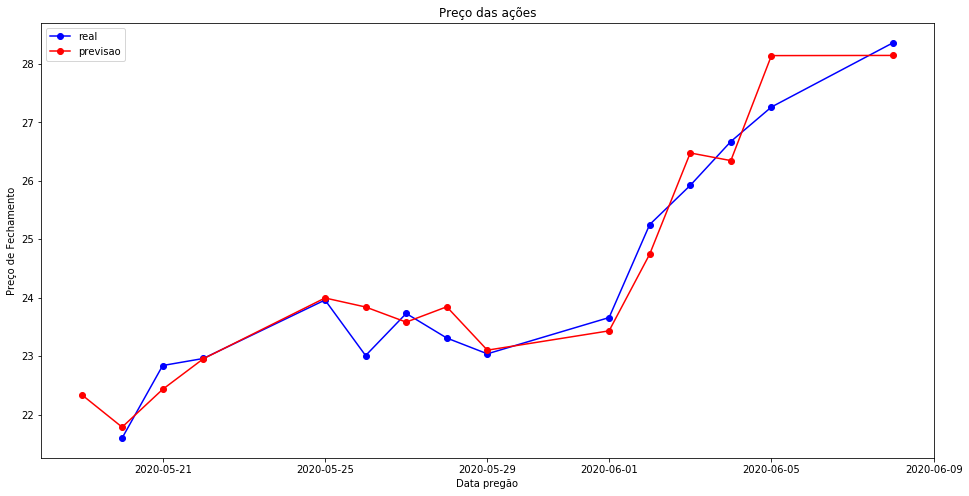

In [44]:
#grafico
plt.figure(figsize=(16,8))
plt.title('Preço das ações')
plt.plot(df['real'],label="real",color='blue', marker='o')
plt.plot(df['previsao'],label="previsao",color='red', marker='o')
plt.xlabel('Data pregão')
plt.ylabel('Preço de Fechamento')
leg = plt.legend()